In [102]:
import numpy as np
import pandas as pd
import os
import time


from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
import warnings
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import GridSearchCV
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
warnings.filterwarnings('ignore')

Reading the dataset

In [3]:
#path to files
path = 'Datasets/Ex4'
all_files = os.listdir(path)

In [4]:
pd_all_data = pd.read_csv(path + '/' + all_files[0])
pd_all_data_X = pd_all_data[pd_all_data.columns[0:-1]]
pd_all_data_Y = pd_all_data[pd_all_data.columns[-1]]

In [5]:
pd_all_data_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


<Figure size 432x288 with 0 Axes>

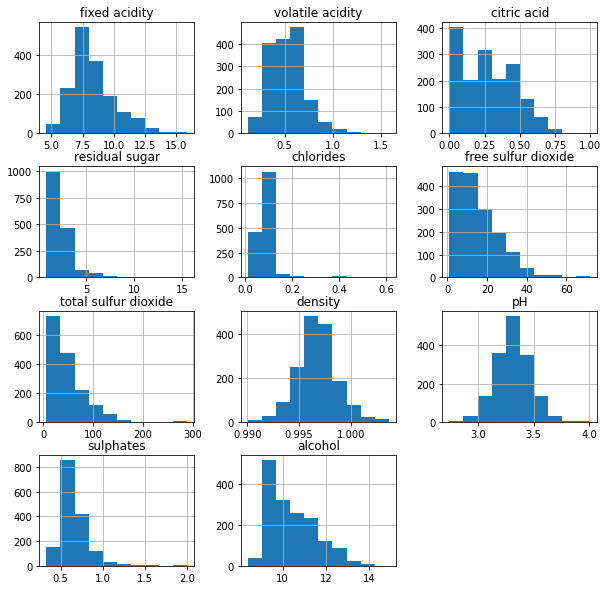

In [6]:
plt.figure()
ax = pd_all_data_X.hist(figsize=(10,10))
#fig = ax.get_figure()
#fig.savefig('Red_Wine_quality/plots/value_distribution.png')

Checking for missing values

In [7]:
np.where(pd_all_data.isnull()==True) #there are no missing values

(array([], dtype=int64), array([], dtype=int64))

In [8]:
pd_all_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking for all categories

In [9]:
pd_all_data_Y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

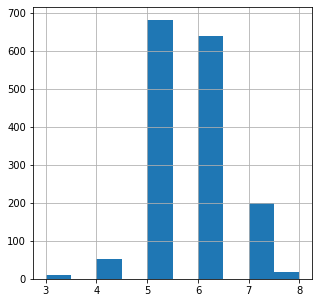

In [10]:

plt.figure()
ax = pd_all_data_Y .hist(figsize=(5,5))
fig = ax.get_figure()
fig.savefig('Red_Wine_quality/plots/class_distribution.png')

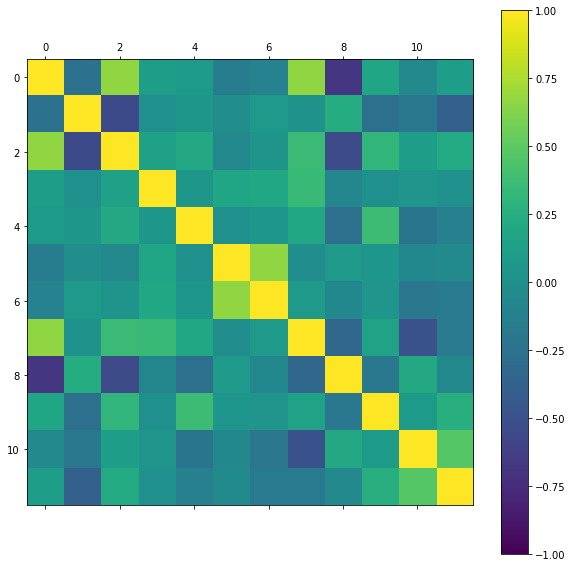

In [11]:
correlations = pd_all_data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()
fig.savefig('Red_Wine_quality/plots/corelation_matrixx.png')

Train/test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(pd_all_data_X, pd_all_data_Y, test_size=0.33, random_state=42)

In [13]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
548,12.4,0.350,0.49,2.6,0.079,27.0,69.0,0.99940,3.12,0.75,10.4
355,6.7,0.750,0.01,2.4,0.078,17.0,32.0,0.99550,3.55,0.61,12.8
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
209,11.0,0.300,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


__________________________________________________________________________________________________

## Preprocessing

In [14]:
#resampling preprocessing
def resample(data_to_res):

    new_class = {'class':[]}
    for x in data_to_res.to_list():
        if x <= 5:
            new_class['class'].append(0)
        else:
            new_class['class'].append(1)
    pd_new_class = pd.DataFrame(new_class)
    
    return pd_new_class

y_train_resampled = resample(y_train)
y_test_resampled = resample(y_test)

array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

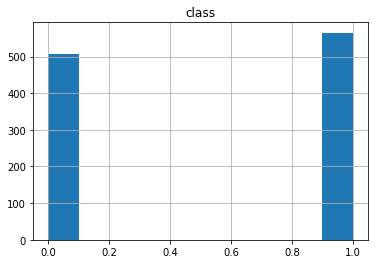

In [15]:
y_train_resampled.hist()


array([[<AxesSubplot:title={'center':'class'}>]], dtype=object)

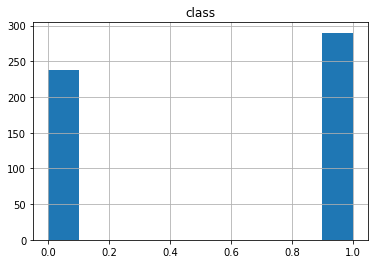

In [16]:
y_test_resampled.hist()

In [17]:
#scaling preprocessing
from usefull_functions import min_max_scaling
max_vals, min_vals, pd_train_X_scaled =  min_max_scaling(X_train)
_,_,pd_test_X_scaled = min_max_scaling(X_test, max_vals, min_vals)

y_train_resampled

Split train into train and validation

In [18]:
#splitting train into train validation

X_train_final_scaled_resampled, X_validation_final_scaled_resampled, Y_train_fina_scaled_resampled, Y_validation_final_scaled_resample = train_test_split(pd_train_X_scaled, y_train_resampled, test_size=0.2, random_state=42)

________________________________________________________

# Model building

## G naive Bayes

In [85]:
gaussian_NB = GaussianNB()
start_time = time.time()
model_NB = gaussian_NB.fit(X_train, y_train_resampled)
stop_time = time.time()

metrics = ['accuracy', 'f1', 'precision', 'recall']

print('N GB with preprocessing: ')
for x in metrics:
    scores = cross_val_score(model_NB,X_train, y_train_resampled, cv=5, scoring=x)
    print('{} score is {}'.format(x,scores.mean()))
    
print('time to fit is {}s'.format(stop_time - start_time))    

N GB with preprocessing: 
accuracy score is 0.7320452075635732
f1 score is 0.7505362473358594
precision score is 0.7381853966027686
recall score is 0.7646017699115044
time to fit is 0.002981424331665039s


_______________

## Support vector machine

In [ ]:
SVC_m = SVC()
hyperparameters = {'C': np.linspace(400,600,11), 
                   'kernel': ['sigmoid'],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

metrics = ['accuracy', 'f1', 'precision', 'recall']

Grid_search_SVC = GridSearchCV(SVC_m, hyperparameters, cv=5,  return_train_score=True, scoring = metrics, refit='accuracy')
model = Grid_search_SVC.fit(X_train, y_train_resampled)

In [ ]:
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best gamma:', model.best_estimator_.get_params()['gamma'])
print('Best Kernel:', model.best_estimator_.get_params()['kernel'])
pd.DataFrame(model.cv_results_).to_csv('Red_Wine_quality/redwine_SVC_output-model,_kernel-sigmoid.csv')

In [100]:
SVC_mod = SVC(C = 700, kernel='rbf', gamma = 0.001)
model = SVC_mod.fit(X_train, y_train_resampled)



In [ ]:
print('test score: ')
prediction = model.predict(pd_test_X_scaled)
acc_scores = accuracy_score(prediction,y_test_resampled)
f1_sc = f1_score(prediction,y_test_resampled)
precision_sc = precision_score(prediction,y_test_resampled)
recall_sc = recall_score(prediction,y_test_resampled)

print('accuracy: {}, f1: {}, precision: {}, recall_sc: {}'.format(acc_scores,f1_sc,precision_sc,recall_sc))

_____________

## Random Forest

In [87]:
rf = RandomForestClassifier(n_estimators=180, max_depth = 15, max_features = 'log2', criterion = 'gini')
model = rf.fit(X_train, y_train_resampled)
prediction = model.predict(X_test)

In [89]:
print('test score: ')
prediction = model.predict(pd_test_X_scaled)
acc_scores = accuracy_score(prediction,y_test_resampled)
f1_sc = f1_score(prediction,y_test_resampled)
precision_sc = precision_score(prediction,y_test_resampled)
recall_sc = recall_score(prediction,y_test_resampled)

print('accuracy: {}, f1: {}, precision: {}, recall_sc: {}'.format(acc_scores,f1_sc,precision_sc,recall_sc))

test score: 
accuracy: 0.6022727272727273, f1: 0.5394736842105263, precision: 0.4241379310344828, recall_sc: 0.7409638554216867
